In [2]:
! pip install networkx

     |████████████████████████████████| 2.1 MB 277 kB/s eta 0:00:01


In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [34]:
G = nx.karate_club_graph()

In [35]:
print("Nodes:", G.nodes)
print("Edges:", G.edges)

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


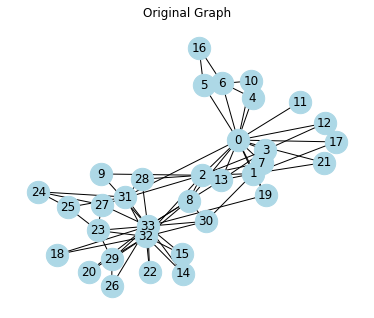

In [36]:
## Draw Graph
pos = nx.spring_layout(G)
plt.figure(figsize=(5,4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
plt.title("Original Graph")
plt.show()

In [37]:
# extract Adjacency matrix
A = nx.adjacency_matrix(G).todense()

In [38]:
# build degree matrix
D = np.diag(np.sum(A, axis=1))

In [39]:
## matrix Laplacian
L = D - A

In [40]:
L.shape

(34, 34)

In [41]:
eigenvalues, eigenvectors = np.linalg.eigh(L)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [-1.57104297e-14  1.18710730e+00  2.39431926e+00  2.93182048e+00
  2.96830180e+00  3.06104079e+00  3.12126310e+00  3.70606484e+00
  3.80094429e+00  4.16160574e+00  4.54469763e+00  4.69727550e+00
  4.97817925e+00  5.16855490e+00  5.59481244e+00  6.44605541e+00
  6.97788032e+00  9.18096651e+00  1.00106981e+01  1.02218147e+01
  1.18744202e+01  1.20754027e+01  1.43813508e+01  1.48885752e+01
  1.70337951e+01  1.93238240e+01  2.13586504e+01  2.27849630e+01
  2.55555039e+01  2.96883840e+01  3.79927558e+01  4.18328632e+01
  4.59907681e+01  5.20653410e+01]
Eigenvectors: [[-0.17149859  0.1233171   0.06155852 ... -0.28195376  0.89148386
  -0.04112292]
 [-0.17149859  0.0580066   0.13116707 ...  0.14191848 -0.06001719
  -0.00213939]
 [-0.17149859  0.01368446  0.08065297 ... -0.10768374 -0.32339704
  -0.06957341]
 ...
 [-0.17149859 -0.1170647  -0.03337568 ... -0.19594468 -0.11904664
   0.09929394]
 [-0.17149859 -0.13538405 -0.04294416 ...  0.8411156   0.21662519
   0.22331175]
 [-0.1714

In [42]:
embedding = eigenvectors[:, 1:3]

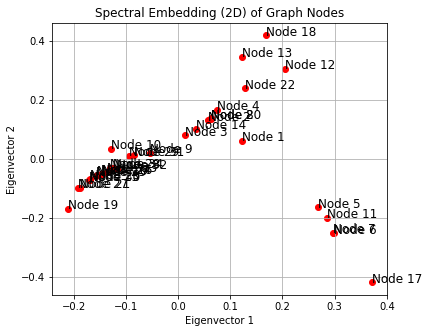

In [43]:



# plot spectral
plt.figure(figsize=(6,5))
plt.scatter(embedding[:, 0], embedding[:, 1], color='red')

for i, (x, y) in enumerate(embedding):
    plt.text(x, y, f"Node {i+1}", fontsize=12)

plt.title("Spectral Embedding (2D) of Graph Nodes")
plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.grid(True)
plt.show()